In [1]:
import tensorflow as tf
import os 

In [2]:
import cv2
import imghdr
import matplotlib.pyplot as plt

<font size=5 color=red>Getting Images</font>

In [12]:
#check number of images
for img in os.listdir('data'):
    print(f"{img} = {len(os.listdir(os.path.join('data',img)))}")

non_scene = 1020
scene = 909


Removing Bad Images

In [7]:
data_dir = 'data'

In [8]:
image_exts = ['jpeg','jpg','bmp','png']

When a image is read in cv2 it is read as matrix<br>
The shape is one row with 3 columns<br>
The first column is the number of pixels on y axis<br>
The second column is the number of pixels on x axis<b>
The third column indicates the color

In [9]:
test_img = cv2.imread(os.path.join('data','people','5b28ee25db803.png'))

In [10]:
#test_img.shape

In [ ]:
plt.imshow(test_img)

In [ ]:
#to fix color
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))

In [11]:
#Goes thorugh all the images in a folder and removes the ones that cannot be read by cv2 or are of a wrong extension
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
                print(f"Issue with image {image_path}")

Image not in ext list data\scene\40785426-blur-image-abstract-landscape-background-of-day-time.jpg
Image not in ext list data\scene\blurred-view-sunset-mountains-260nw-1018967875.jpg
Image not in ext list data\scene\blurry-landscape-background-260nw-266391017.jpg
Image not in ext list data\scene\depositphotos_278098042-stock-photo-blur-background-forest-landscape-blur.jpg
Image not in ext list data\scene\handheld-blurred-park-scenery-visible-footage-090377257_prevstill.jpeg
Image not in ext list data\scene\in-summer-background-at-morning-with-sunlight-blur-defocused-park-2318423111.jpg
Image not in ext list data\scene\microsoft-teams-blur-background-2158-x-1440-dz4xsybgwub3dwps.jpg
Image not in ext list data\scene\scenery-of-mountains-and-forest-areas-in-the-morning-abstract-background-for.jpg
Image not in ext list data\scene\seraphic-digital-print-abstract-blurred-landscape-promo-1.jpg
Image not in ext list data\scene\stock-photo-blur-scenery-of-supermarket-freezer-2304082517.jpg
Imag

In [13]:
import numpy as np

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')
#resizes images into 256,256 
#batchs of 32 
#shuffles 
#labels the data

Found 1929 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
#all the data can be iterated through in batches 
#using the next() function we can bring in the next set of data this is useful in big data sets

In [22]:
#get new batch
batch = data_iterator.next()

In [23]:
#2 people
#0 blurred
#1 documents
len(batch)
#the first part is the image array and the second part is the label of the image

2

In [24]:
batch[1]

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

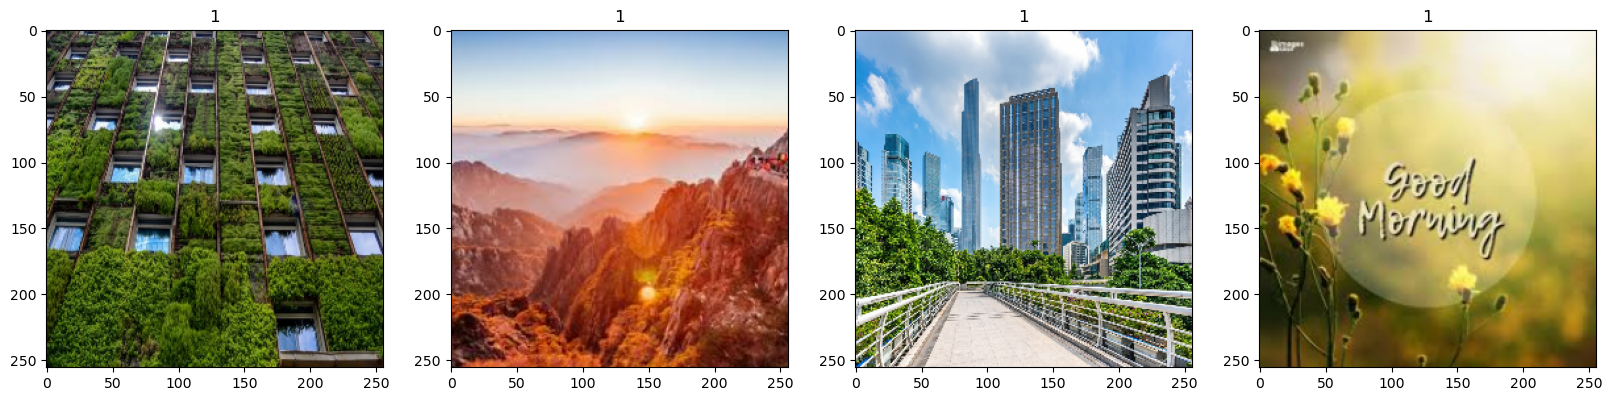

In [25]:
fig,ax = plt.subplots(ncols =4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

<font size=5 color=red>Preprocessing Data</font>

We need to scale the data between 0-1 instead of the 0-255 that the images are in 

In [26]:
scaled = batch[0]/255

In [27]:
scaled.max()

1.0

In [28]:
scaled.min()

0.0

In [29]:
data = data.map(lambda x,y: (x/255 , y))

In [30]:
data.as_numpy_iterator().next()

(array([[[[9.56862748e-01, 9.72549021e-01, 9.68627453e-01],
          [9.56862748e-01, 9.72549021e-01, 9.68627453e-01],
          [9.56862748e-01, 9.72549021e-01, 9.68627453e-01],
          ...,
          [9.56862748e-01, 9.72549021e-01, 9.68627453e-01],
          [9.56862748e-01, 9.72549021e-01, 9.68627453e-01],
          [9.56862748e-01, 9.72549021e-01, 9.68627453e-01]],
 
         [[9.56862748e-01, 9.72549021e-01, 9.68627453e-01],
          [9.56862748e-01, 9.72549021e-01, 9.68627453e-01],
          [9.56862748e-01, 9.72549021e-01, 9.68627453e-01],
          ...,
          [9.56862748e-01, 9.72549021e-01, 9.68627453e-01],
          [9.56862748e-01, 9.72549021e-01, 9.68627453e-01],
          [9.56862748e-01, 9.72549021e-01, 9.68627453e-01]],
 
         [[9.56862748e-01, 9.72549021e-01, 9.68627453e-01],
          [9.56862748e-01, 9.72549021e-01, 9.68627453e-01],
          [9.56862748e-01, 9.72549021e-01, 9.68627453e-01],
          ...,
          [9.56862748e-01, 9.72549021e-01, 9.6862

In [31]:
len(data)

61

In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [35]:
train_size + val_size  + test_size

61

In [36]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

<font size=5 color=red>Building the model</font>

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras import layers,models

Conv2D/MaxPooling makes it so that only the max regions are returned<br>
Dense layer is for all the layers<br>
Flatten makes the input readable

In [38]:
model = Sequential([
    Conv2D(16, (3, 3),1 ,activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3),1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), 1,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [39]:

model.compile('adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [41]:

hist = model.fit(train, epochs=20, validation_data=val)
%time

Epoch 1/20
42/42 [==============================] - 19s 428ms/step - loss: 0.6439 - accuracy: 0.6689 - val_loss: 0.4753 - val_accuracy: 0.7332
Epoch 2/20
42/42 [==============================] - 19s 437ms/step - loss: 0.4338 - accuracy: 0.7946 - val_loss: 0.3586 - val_accuracy: 0.8582
Epoch 3/20
42/42 [==============================] - 19s 437ms/step - loss: 0.3415 - accuracy: 0.8690 - val_loss: 0.3925 - val_accuracy: 0.8630
Epoch 4/20
42/42 [==============================] - 19s 440ms/step - loss: 0.2872 - accuracy: 0.8728 - val_loss: 0.4093 - val_accuracy: 0.8053
Epoch 5/20
42/42 [==============================] - 19s 444ms/step - loss: 0.2483 - accuracy: 0.8973 - val_loss: 0.2616 - val_accuracy: 0.8870
Epoch 6/20
42/42 [==============================] - 20s 457ms/step - loss: 0.1991 - accuracy: 0.9219 - val_loss: 0.2534 - val_accuracy: 0.9207
Epoch 7/20
42/42 [==============================] - 20s 465ms/step - loss: 0.1433 - accuracy: 0.9472 - val_loss: 0.3134 - val_accuracy: 0.8702

In [42]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [43]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [44]:
len(test)

6

In [45]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 72ms/step


In [46]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.8289473652839661, Recall:0.8873239159584045, Accuracy:0.8757396340370178


<font size=5 color=red>Testing</font>

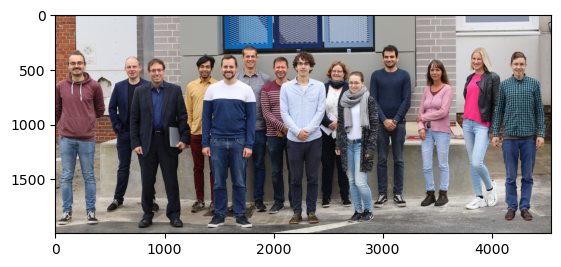

In [49]:
test_path = os.path.join('data','people','gruppenfoto_webpage_ole.png')
test_img = cv2.imread(test_path)
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))
plt.show()

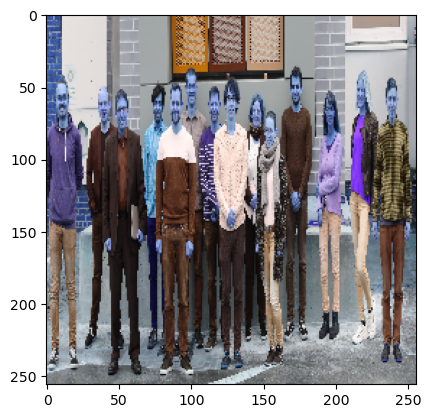

In [50]:
resize = tf.image.resize(test_img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [51]:
test_pred = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 20ms/step


In [52]:
test_pred

array([[1.]], dtype=float32)

<font size=5 color=red>Save Model</font>

In [47]:
from tensorflow.keras.models import load_model

In [48]:
model.save(os.path.join('models','scene_people.h5'))

C:\Users\aditi\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


To reload a model use 
new_model = load_model(os.path.join('models','modelname.h5'))